In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('data.csv', index_col=0)
df.head(5)

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
0,57,616,2,1,3,-153263.200759,0.23,42658.02
1,45,591,1,1,1,161474.307306,0.24,248327.61
2,59,613,1,1,1,14209.331170,0.09,24371.94
3,62,656,1,1,1,-77270.897162,0.17,48788.04
4,45,567,2,1,5,282353.182490,0.22,47808.66


In [3]:
abt_df = df.copy()

In [4]:
inflation = 0.044

In [5]:
def apply_inflation_to_ammount(first_period_value, periods_cnt):
    return first_period_value * (math.pow(inflation + 1, periods_cnt) - 1) / inflation

def adjusted_period_contribution(first_period_contribution, period_number):
    return first_period_contribution * math.pow(inflation + 1, period_number - 1)

In [6]:
def new_accumulated_contribution(row):
    years = int(65-row['initial_age']+1)
    first_contribution = row['income'] * row['annual_contribution']
    contribution = apply_inflation_to_ammount(first_contribution, years)
    return contribution

In [7]:
abt_df['contribution'] = abt_df.apply(new_accumulated_contribution, axis=1)

In [8]:
abt_df.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution
0,57,616,2,1,3,-153263.200759,0.23,42658.02,1.055489e+05
1,45,591,1,1,1,161474.307306,0.24,248327.61,1.991240e+06
2,59,613,1,1,1,14209.331170,0.09,24371.94,1.753644e+04
3,62,656,1,1,1,-77270.897162,0.17,48788.04,3.543041e+04
4,45,567,2,1,5,282353.182490,0.22,47808.66,3.514120e+05


In [9]:
def phase_out(row):
    # every line represents a head of househoud.
    # therefore, nobody must be classified as single filing
    if (row['marital_status'] == 1 and row['family_kind'] == 1):
        return 3 # couple
    else:
        return 2 # head of household

In [10]:
abt_df['phase_out'] = abt_df.apply(phase_out, axis=1)
abt_df.head(5)

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,phase_out
0,57,616,2,1,3,-153263.200759,0.23,42658.02,1.055489e+05,2
1,45,591,1,1,1,161474.307306,0.24,248327.61,1.991240e+06,3
2,59,613,1,1,1,14209.331170,0.09,24371.94,1.753644e+04,3
3,62,656,1,1,1,-77270.897162,0.17,48788.04,3.543041e+04,3
4,45,567,2,1,5,282353.182490,0.22,47808.66,3.514120e+05,2


In [11]:
def phase_out_range(phase_out):
    range = {1:(20500,35500), 2:(30750,53250), 3:(41000,71000)}
    return range[phase_out]

In [12]:
def phase_out_values(row):
    return (row['marital_status'],row['family_kind'],row['phase_out'])

In [13]:
values = abt_df.apply(phase_out_values, axis=1).unique()

In [14]:
values

array([(3.0, 2.0, 2.0), (1.0, 1.0, 3.0), (5.0, 2.0, 2.0), (5.0, 3.0, 2.0),
       (1.0, 3.0, 2.0), (3.0, 3.0, 2.0), (4.0, 2.0, 2.0), (2.0, 2.0, 2.0),
       (2.0, 3.0, 2.0), (4.0, 3.0, 2.0), (1.0, 2.0, 2.0)], dtype=object)

In [15]:
family_kind = ['Husband-Wife','Male-led','Female-Led']
marital_status = ['Married','Widowed','Divorced','Separated','Never married']
phase_out_dsc = ['single','head-of-household', 'married couple']

In [16]:
status = [(marital_status[int(ms)-1], family_kind[int(fk)-1], phase_out_dsc[int(po)-1]) for ms, fk, po in values]

In [17]:
status.sort()

In [18]:
status

[('Divorced', 'Female-Led', 'head-of-household'),
 ('Divorced', 'Male-led', 'head-of-household'),
 ('Married', 'Female-Led', 'head-of-household'),
 ('Married', 'Husband-Wife', 'married couple'),
 ('Married', 'Male-led', 'head-of-household'),
 ('Never married', 'Female-Led', 'head-of-household'),
 ('Never married', 'Male-led', 'head-of-household'),
 ('Separated', 'Female-Led', 'head-of-household'),
 ('Separated', 'Male-led', 'head-of-household'),
 ('Widowed', 'Female-Led', 'head-of-household'),
 ('Widowed', 'Male-led', 'head-of-household')]

In [19]:
def eligible_to_savers_match(row):
    range = phase_out_range(row['phase_out'])
    income = row['income']
    return income >= range[0] and income <= range[1]

In [20]:
abt_df['eligible_to_savers_match'] = abt_df.apply(eligible_to_savers_match, axis=1)

In [21]:
abt_df.head(5)

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,phase_out,eligible_to_savers_match
0,57,616,2,1,3,-153263.200759,0.23,42658.02,1.055489e+05,2,True
1,45,591,1,1,1,161474.307306,0.24,248327.61,1.991240e+06,3,False
2,59,613,1,1,1,14209.331170,0.09,24371.94,1.753644e+04,3,False
3,62,656,1,1,1,-77270.897162,0.17,48788.04,3.543041e+04,3,True
4,45,567,2,1,5,282353.182490,0.22,47808.66,3.514120e+05,2,True


In [22]:
def applicable_percentage(row):
    eligible = row['eligible_to_savers_match']
    if not eligible:
        return 0
    range = phase_out_range(row['phase_out'])
    range_spread = range[1] - range[0]
    return 0.5 * (range[1] - row['income']) / range_spread

In [23]:
abt_df['applicable_percentage'] = abt_df.apply(applicable_percentage, axis=1)

In [24]:
abt_df

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,phase_out,eligible_to_savers_match,applicable_percentage
0,57,616,2,1,3,-153263.200759,0.23,42658.02,1.055489e+05,2,True,0.235377
1,45,591,1,1,1,161474.307306,0.24,248327.61,1.991240e+06,3,False,0.000000
2,59,613,1,1,1,14209.331170,0.09,24371.94,1.753644e+04,3,False,0.000000
3,62,656,1,1,1,-77270.897162,0.17,48788.04,3.543041e+04,3,True,0.370199
4,45,567,2,1,5,282353.182490,0.22,47808.66,3.514120e+05,2,True,0.120919
...,...,...,...,...,...,...,...,...,...,...,...,...
47621,57,338,1,4,1,78981.212968,0.33,141575.22,5.026045e+05,3,False,0.000000
47622,41,350,3,4,3,31142.729450,0.34,141479.43,2.114732e+06,2,False,0.000000
47623,56,347,3,4,3,-208621.026557,0.09,33780.18,3.718546e+04,2,True,0.432663
47624,43,255,1,3,1,925647.121780,0.34,176587.72,2.309112e+06,3,False,0.000000


In [25]:
def match_value(contribution, percent):
    match = 0.0
    if contribution >= 10000:
        match = 10000 * percent
    elif contribution >= 100:
        match = contribution * percent
    return match

In [26]:
abt_df['first_match_value'] = abt_df.apply(
    lambda row:match_value(row['contribution'], row['applicable_percentage']), 
    axis=1)

In [27]:
abt_df

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,phase_out,eligible_to_savers_match,applicable_percentage,first_match_value
0,57,616,2,1,3,-153263.200759,0.23,42658.02,1.055489e+05,2,True,0.235377,2353.773333
1,45,591,1,1,1,161474.307306,0.24,248327.61,1.991240e+06,3,False,0.000000,0.000000
2,59,613,1,1,1,14209.331170,0.09,24371.94,1.753644e+04,3,False,0.000000,0.000000
3,62,656,1,1,1,-77270.897162,0.17,48788.04,3.543041e+04,3,True,0.370199,3701.993333
4,45,567,2,1,5,282353.182490,0.22,47808.66,3.514120e+05,2,True,0.120919,1209.186667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47621,57,338,1,4,1,78981.212968,0.33,141575.22,5.026045e+05,3,False,0.000000,0.000000
47622,41,350,3,4,3,31142.729450,0.34,141479.43,2.114732e+06,2,False,0.000000,0.000000
47623,56,347,3,4,3,-208621.026557,0.09,33780.18,3.718546e+04,2,True,0.432663,4326.626667
47624,43,255,1,3,1,925647.121780,0.34,176587.72,2.309112e+06,3,False,0.000000,0.000000


In [28]:
def accumulated_match(row):
    years = int(65-row['initial_age']+1)
    first_contribution = row['income'] * row['annual_contribution']
    total_match = 0
    for period in range(years):
        contribution = adjusted_period_contribution(first_contribution, period)
        total_match += match_value(contribution, row['applicable_percentage'])
    return total_match

In [29]:
abt_df['accumulated_match'] = abt_df.apply(accumulated_match, axis=1)

In [30]:
abt_df

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,phase_out,eligible_to_savers_match,applicable_percentage,first_match_value,accumulated_match
0,57,616,2,1,3,-153263.200759,0.23,42658.02,1.055489e+05,2,True,0.235377,2353.773333,20997.819899
1,45,591,1,1,1,161474.307306,0.24,248327.61,1.991240e+06,3,False,0.000000,0.000000,0.000000
2,59,613,1,1,1,14209.331170,0.09,24371.94,1.753644e+04,3,False,0.000000,0.000000,0.000000
3,62,656,1,1,1,-77270.897162,0.17,48788.04,3.543041e+04,3,True,0.370199,3701.993333,12563.519109
4,45,567,2,1,5,282353.182490,0.22,47808.66,3.514120e+05,2,True,0.120919,1209.186667,25392.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47621,57,338,1,4,1,78981.212968,0.33,141575.22,5.026045e+05,3,False,0.000000,0.000000,0.000000
47622,41,350,3,4,3,31142.729450,0.34,141479.43,2.114732e+06,2,False,0.000000,0.000000,0.000000
47623,56,347,3,4,3,-208621.026557,0.09,33780.18,3.718546e+04,2,True,0.432663,4326.626667,15410.689084
47624,43,255,1,3,1,925647.121780,0.34,176587.72,2.309112e+06,3,False,0.000000,0.000000,0.000000


In [31]:
abt_df['new_accumulated_capital'] = abt_df['accumulated_capital'] + abt_df['accumulated_match'] + abt_df['contribution']
abt_df

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,phase_out,eligible_to_savers_match,applicable_percentage,first_match_value,accumulated_match,new_accumulated_capital
0,57,616,2,1,3,-153263.200759,0.23,42658.02,1.055489e+05,2,True,0.235377,2353.773333,20997.819899,-2.671647e+04
1,45,591,1,1,1,161474.307306,0.24,248327.61,1.991240e+06,3,False,0.000000,0.000000,0.000000,2.152714e+06
2,59,613,1,1,1,14209.331170,0.09,24371.94,1.753644e+04,3,False,0.000000,0.000000,0.000000,3.174577e+04
3,62,656,1,1,1,-77270.897162,0.17,48788.04,3.543041e+04,3,True,0.370199,3701.993333,12563.519109,-2.927697e+04
4,45,567,2,1,5,282353.182490,0.22,47808.66,3.514120e+05,2,True,0.120919,1209.186667,25392.920000,6.591581e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47621,57,338,1,4,1,78981.212968,0.33,141575.22,5.026045e+05,3,False,0.000000,0.000000,0.000000,5.815858e+05
47622,41,350,3,4,3,31142.729450,0.34,141479.43,2.114732e+06,2,False,0.000000,0.000000,0.000000,2.145875e+06
47623,56,347,3,4,3,-208621.026557,0.09,33780.18,3.718546e+04,2,True,0.432663,4326.626667,15410.689084,-1.560249e+05
47624,43,255,1,3,1,925647.121780,0.34,176587.72,2.309112e+06,3,False,0.000000,0.000000,0.000000,3.234759e+06


In [32]:
abt_df['age_cohort'] = pd.cut(abt_df['initial_age'], bins=[35,40,45,50,55,60,65], right=False)

In [33]:
abt_df.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,phase_out,eligible_to_savers_match,applicable_percentage,first_match_value,accumulated_match,new_accumulated_capital,age_cohort
0,57,616,2,1,3,-153263.200759,0.23,42658.02,1.055489e+05,2,True,0.235377,2353.773333,20997.819899,-2.671647e+04,"[55, 60)"
1,45,591,1,1,1,161474.307306,0.24,248327.61,1.991240e+06,3,False,0.000000,0.000000,0.000000,2.152714e+06,"[45, 50)"
2,59,613,1,1,1,14209.331170,0.09,24371.94,1.753644e+04,3,False,0.000000,0.000000,0.000000,3.174577e+04,"[55, 60)"
3,62,656,1,1,1,-77270.897162,0.17,48788.04,3.543041e+04,3,True,0.370199,3701.993333,12563.519109,-2.927697e+04,"[60, 65)"
4,45,567,2,1,5,282353.182490,0.22,47808.66,3.514120e+05,2,True,0.120919,1209.186667,25392.920000,6.591581e+05,"[45, 50)"


In [34]:
# The Retirement Readiness Rating is defined as:
# Number of persons who were able to afford its retirement / Total number of persons

def retirement_readiness_rating(row, capital):
    return (row[capital] >= 0).sum() / row['initial_age'].count()

In [35]:
readiness_rating_df = \
    abt_df.groupby(['age_cohort'])\
        .apply(retirement_readiness_rating, 'new_accumulated_capital')\
        .reset_index()\
        .rename(columns={0:'readiness_rating_new'})

In [36]:
readiness_rating_df

,age_cohort,readiness_rating_new
0,"[35, 40)",0.942500
1,"[40, 45)",0.925951
2,"[45, 50)",0.891525
3,"[50, 55)",0.849513
4,"[55, 60)",0.782411
5,"[60, 65)",0.692728


In [37]:
readiness_rating_df['readiness_rating'] = \
    abt_df.groupby(['age_cohort'])\
            .apply(retirement_readiness_rating, 'accumulated_capital')\
            .reset_index()[0]

In [38]:
readiness_rating_df['difference'] = readiness_rating_df['readiness_rating_new'] - readiness_rating_df['readiness_rating']

In [39]:
readiness_rating_df

,age_cohort,readiness_rating_new,readiness_rating,difference
0,"[35, 40)",0.942500,0.617707,0.324792
1,"[40, 45)",0.925951,0.608628,0.317323
2,"[45, 50)",0.891525,0.598038,0.293487
3,"[50, 55)",0.849513,0.564928,0.284585
4,"[55, 60)",0.782411,0.577163,0.205248
5,"[60, 65)",0.692728,0.575161,0.117567


In [40]:
# weighted avg
# The Retirement Savings Shortfall is defined as:
# Sum of the accumulate of all the persons who had deficits / Total number of persons

def wavg_retirement_savings_shortfall(row):
    retirement_savings_shortfall = (row['new_accumulated_capital'] < 0).sum() / row['initial_age'].count()
    return (row['weight'] * retirement_savings_shortfall).sum() / row['weight'].sum()
    # return retirement_savings_shortfall.sum() / row['weight'].count()

In [41]:
wavg_shortfall_df = \
    abt_df.groupby(['age_cohort','race'])\
        .apply(wavg_retirement_savings_shortfall)\
        .reset_index()\
        .rename(columns={0:'wavg_retirement_savings_shortfall'})

In [42]:
wavg_shortfall_df

,age_cohort,race,wavg_retirement_savings_shortfall
0,"[35, 40)",1,0.053590
1,"[35, 40)",2,0.061920
2,"[35, 40)",3,0.071638
3,"[35, 40)",4,0.045213
4,"[40, 45)",1,0.071181
5,"[40, 45)",2,0.066100
6,"[40, 45)",3,0.094083
7,"[40, 45)",4,0.061358
8,"[45, 50)",1,0.101671
9,"[45, 50)",2,0.124432


In [43]:
race_mapping = {1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Other'}
wavg_shortfall_df['race_name'] = wavg_shortfall_df['race'].map(race_mapping)

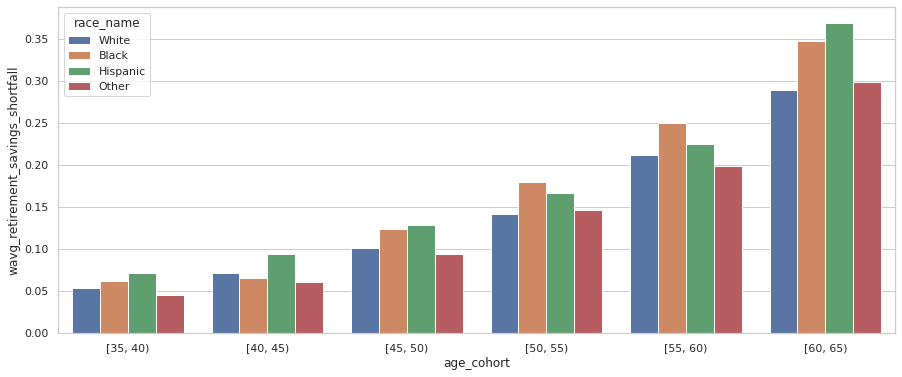

In [44]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,6))
sns.barplot(data = wavg_shortfall_df, x = 'age_cohort', y = 'wavg_retirement_savings_shortfall', hue = 'race_name')
plt.show()

<AxesSubplot:xlabel='age_cohort', ylabel='difference'>

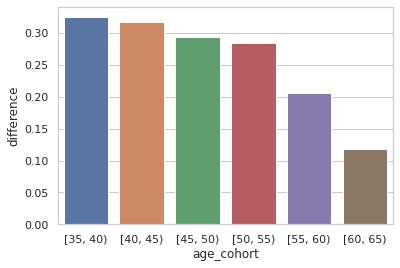

In [45]:
sns.barplot(data = readiness_rating_df, x = 'age_cohort', y = 'difference')

In [46]:
abt_df.columns

Index(['initial_age', 'weight', 'family_kind', 'race', 'marital_status',
       'accumulated_capital', 'annual_contribution', 'income', 'contribution',
       'phase_out', 'eligible_to_savers_match', 'applicable_percentage',
       'first_match_value', 'accumulated_match', 'new_accumulated_capital',
       'age_cohort'],
      dtype='object')

In [47]:
abt_df.to_csv('new_scenario.csv', columns = ['initial_age', 'weight', 'family_kind', 'race', 'marital_status',
       'accumulated_capital', 'annual_contribution', 'income','new_accumulated_capital'])